# Import libraries

In [1]:
import numpy as np
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import GroverOperator

# Generate S_e

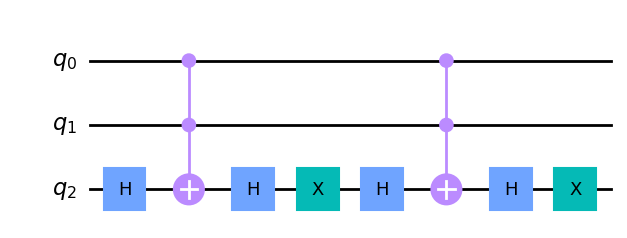

In [3]:
observation = [2]
opSe = QuantumCircuit(3)
# TODO: X gates encode
for obs in observation:
    crtls = list({0,1,2} - {obs})
    # multi control z gate
    opSe.h(obs)
    opSe.mcx(crtls, obs)
    opSe.h(obs)
    # x gate
    opSe.x(obs)
    # multi control z gate
    opSe.h(obs)
    opSe.mcx(crtls, obs)
    opSe.h(obs)
    # c gate
    opSe.x(obs)

opSe.draw(output='mpl')

In [4]:
# Get the Aer simulator backend
simulator_backend = Aer.get_backend('aer_simulator')
def run_circuit(circuit, shots=10_000):
    """
    Run the provided quantum circuit on the Aer simulator backend.

    Parameters:
    - circuit: The quantum circuit to be executed.
    - shots (default=10,000): The number of times the circuit is executed.

    Returns:
    - counts: A dictionary with the counts of each quantum state result.
    """
    # Transpile the circuit for the given backend
    transpiled_circuit = transpile(circuit, simulator_backend)

    # Run the transpiled circuit on the simulator
    job = simulator_backend.run(transpiled_circuit, shots=shots)
    result = job.result()

    # Get the counts of quantum state results
    counts = result.get_counts(transpiled_circuit)

    return counts

opSe.measure_all()
run_circuit(opSe)

{'000': 10000}